In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def createNoise(n):
    r = np.random.normal(0,1,pow(n,2))
    maxr = max(r)
    minr = min(r)
    rnorm = [510*(i-minr)/(maxr-minr)-255 for i in r]
    noise = [[rnorm[(j-1)*n+i] for j in range(n)] for i in range(n)]
    return noise

def vgBool(x,i,j):
    if abs(i-j)<=1:
        return True
    v = [x[i]+(k-i)/(j-i)*(x[j]-x[i])-x[k] for k in range(min(i,j)+1,max(i,j))]
    return sum(np.sign(v))==len(v)

def boole(M,i,j,k,l):
    if (i == k and j == l):
        return False
    if i == k:
        return vgBool(M[i][min(j,l):max(j,l)+1],0,abs(l-j))
    if j == l:
        return vgBool([M[i][j] for i in range(min(i,k),max(i,k)+1)],0,abs(k-i))
    if abs(i-k) == abs(j-l):
        [dirx,diry] = [-int((i-k)/abs(i-k)),-int((j-l)/abs(i-k))]
        return vgBool([M[i+k*dirx][j+k*diry] for k in range(abs(i-k)+1)],0,abs(k-i))
    return False

def weightMatElem(M,i,j):
    n = len(M)
    dif = abs(i - j)
    min1 = min(i,j)
    max1 = max(i,j)
    min2 = min(i,n-j-1)
    max2 = min(n-i,j+1)
    return sum([boole(M,i,j,i,k) for k in range(n)]) + sum([boole(M,i,j,k,j) for k in range(n)]) + sum([boole(M,i,j,i+k,j+k) for k in range(-min1,n-max1)]) + sum([boole(M,i,j,i+k,j-k) for k in range(-min2,max2)])

def weightMat(M):
    n = len(M)
    return [[weightMatElem(M,i,j) for j in range(n)] for i in range(n)]

def hWeightMat(M):
    n = len(M)
    return [[sum([boole(M,i,k,i,j) for k in range(n)]) for j in range(n)] for i in range(n)]

def vWeightMat(M):
    n = len(M)
    return [[sum([boole(M,k,j,i,j) for k in range(n)]) for j in range(n)] for i in range(n)]

def addNoise(image,noise,coeff):
    return np.clip([[z+coeff*w for (z,w) in zip(x,y)] for (x, y) in zip(image,noise)],0,255)

In [9]:
boatIm = Image.open('boat.png')
boat = np.array(boatIm).tolist()
n = len(boat)
noise = createNoise(n)
noiseCoeff = 0.5
boatNoise = addNoise(boat,noise,noiseCoeff)

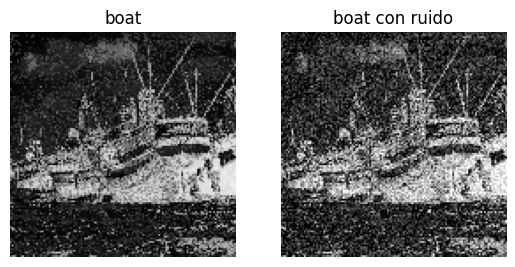

In [10]:
plt.subplot(1,2,1)
plt.imshow(boat, cmap='gray',vmin=0,vmax=255)
plt.title('boat')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(boatNoise, cmap='gray',vmin=0,vmax=255)
plt.title('boat con ruido')
plt.axis('off')

plt.show()

In [ ]:
boatIVG = weightMat(boat)
boatNoiseIVG = weightMat(boatNoise)
noiseIVG = weightMat(noise)

In [ ]:
# histogramas
# más imágenes
# diagonales
# comparar ivg:
# ·ruido blanco
# ·imagenes sin ruido
# ·imagenes con ruido